In [1]:
import pandas as pd
import numpy as np

In [2]:
# choosing the dataset
dataset = pd.read_csv("salary.csv")

In [3]:
# summarize the dataset
dataset.shape

(32561, 5)

In [4]:
dataset.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [5]:
# mapping salary data into Binary Value
income_set = set(dataset['income'])
dataset['income']= dataset['income'].map({'<=50K':0, '>50K':1}).astype(int)

In [6]:
dataset.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0


# segregate dataset

In [8]:
X = dataset.iloc[:,:-1].values
X

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [9]:
Y = dataset.iloc[:,-1].values
Y

array([0, 0, 0, ..., 1, 0, 0])

# Splitting dataset into Train and Test

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

# Feature Scaling

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Finding the Best k-value

Text(0, 0.5, 'Mean Error')

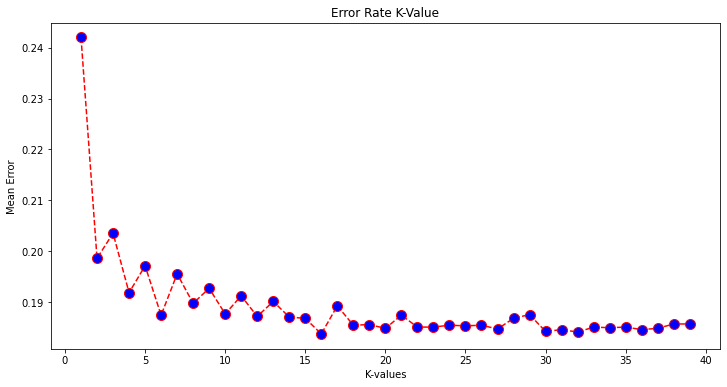

In [15]:
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# calculating error for K-values between 1 to 40
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    pred_i = model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title("Error Rate K-Value")
plt.xlabel("K-values")
plt.ylabel("Mean Error")

# Training

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=16, metric="minkowski",p=2)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=16)

# Predicting wheather new customer with Age and Salary will Buy or Not

In [31]:
age = int(input("Enter the New Employee Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Capital Gain: "))
wh = int(input("Enter New Employee's Housrs Per Week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)

if result == 1:
    print("Employee might not got Salary above 50K")
else:
    print("Customer might not got Salary above 50K")

Enter the New Employee Age: 68
Enter New Employee's Education: 9
Enter New Employee's Capital Gain: 01
Enter New Employee's Housrs Per Week: 40
[0]
Customer might not got Salary above 50K


# Prediction for Test Data

In [30]:
y_pred = model.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


# Evaluating Model

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix")
print(cm)

accuracy = accuracy_score(y_test, y_pred)*100
print("Accuracy Score of the model:")
print(accuracy)

Confusion matrix
[[5941  252]
 [1365  583]]
Accuracy Score of the model:
80.13757523645744
